# Robotic Principles Review

## 01 - Introduction

### Degrees of Freedom of a Body, $dof$

A rigid body in a 3D space (spatial) has 6 degrees of freedom.

* ($x$, $y$, $z$) coordinates specifying the position of the centre of mass.
* 3 angles ($\theta$, $\phi$, $\psi$)



![image.png](https://www.researchgate.net/publication/329603549/figure/fig1/AS:703246263926788@1544678383831/An-illustration-of-the-three-angles-yaw-pitch-and-roll-returned-by-the-Hyper-IMU.png )

degrees of freedom = (sum of freedoms of the bodies) - (number of independent constraints)

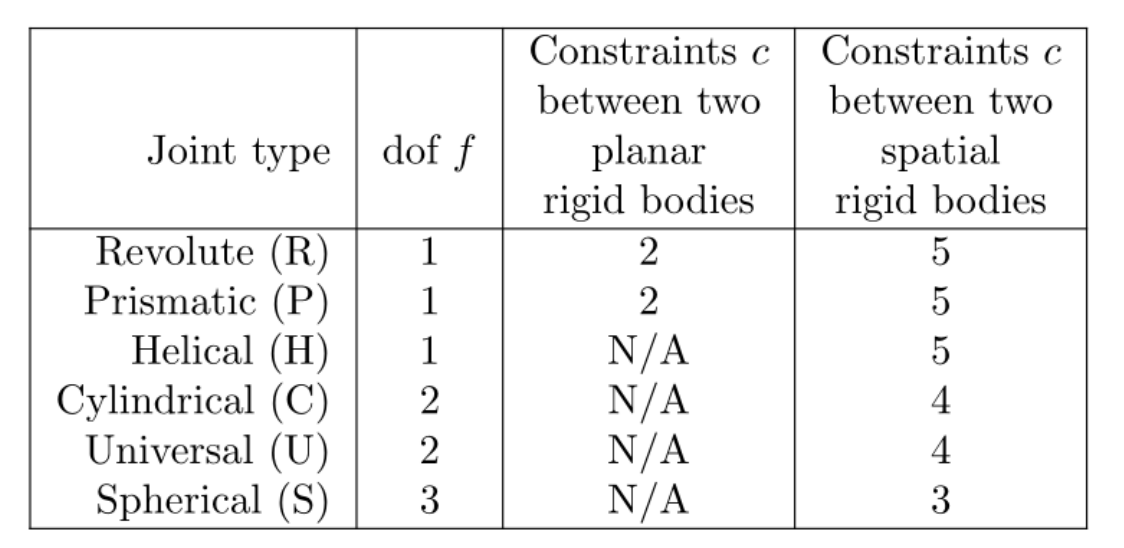

### **Grubler’s Formula**

$$
dof = m \cdot (N - 1 - J) + \sum_{i=1}^{J} f_i 
$$

Where:

* $N$ links (ground also a link)
* $J$ joints
* $m$ degrees of freedom ( 3 for planar, 6 for spatial)
* $f_i$ number of freedoms provided by joint $i$
* $c_i$ number of constraint provided by joint $i$, where $f_i + c_i = m$ for all joint $i$

assumes all joints constraints are independent.

$$
dof = m \cdot (N - 1) - \sum_{i=1}^{J} c_i 
$$

$$
dof = \text{rigid body freedoms } - \text{ joint constraints}
$$

Example:
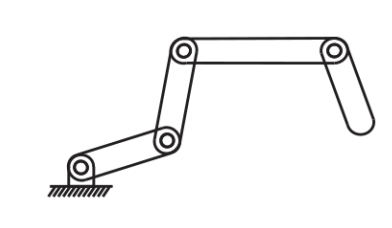

$m$ = 3 (planar) (3 or 6?)

$J$ = 4 (how many joints?)

$N$ = 5 (including ground) (how many links, including ground?)

$f_i$ = 1 (number of freedom of each joint type?)

$$
dof = 3(5 - 1 - 4) + 4 = 4
$$

## 02 - Grübler's Formula - $dof$

Implement a Python function which **calculates and returns the number of degrees of freedom of a robot manipulator consisting of links and joints**. The calculation should be done using the **Grübler's formula**.

The function should accept 4 arguments: N the number of links (including the ground), J the number of joints, m the degrees of freedom of a rigid body and a list containing the fi values corresponding to the number of freedoms provided by joints i.

In [3]:
def calcDof(N, J, m, fi):
  """
  Args:
    N: The number of links (including the ground).
    J: The number of joints.
    m: The degrees of freedom of a rigid body (usually 6 in 3D space, 3 in 2D).
    fi: fi value corresponding to the number of freedoms provided by each joint.

  Returns:
    The degrees of freedom of the robot manipulator.
  """

  # Grübler's formula:
  # dof = m * (N - 1 - J) + fi  

  for fi in range(J):
    fi += 1 #degrees of freedom corresponding to the number of joints
  
  step1 = N - 1 - J
  step2 = m * step1
  dof = step2 + fi
  
  return dof

# Example usage:
N = 4  # Number of links
J = 4  # Number of joints
m = 3  # Degrees of freedom
fi = 1  # Freedoms provided by each joint 

dof = calcDof(N, J, m, fi)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 1


## More Grübler's Formula 

Implement a Python function which when called, it asks the user the number of revolute joints, the number of prismatic joints, the number of helical joints, the number of cylindrical joints, the number of universal joints and the number of spherical joints for a robot manipulator.

Following that, the user is asked about the number of links of the manipulator, and whether it is a planar or a spatial body and how many degrees of freedom fi each joint has (you should use a loop for the latter).

The function uses Grübler's formula and Python f-strings to return the result as a string exactly as shown in the example below:

```
m = 3 (planar) 
J = 4 
N = 5 (including the ground) 
f_1 = 1 
f_2 = 1 
f_3 = 1 
f_4 = 1 
dof = m(N-1-J) + f_1 + f_2 + f_3 + f_4 = 3(5 - 1 - 4) + 1 + 1 + 1 + 1 + = 4
```

In [64]:
def calculate_dof_grubler():
    
    # Get joint types and counts from the user
    revolute_joints = int(input("Enter the number of revolute joints: "))
    prismatic_joints = int(input("Enter the number of prismatic joints: "))
    helical_joints = int(input("Enter the number of helical joints: "))
    cylindrical_joints = int(input("Enter the number of cylindrical joints: "))
    universal_joints = int(input("Enter the number of universal joints: "))
    spherical_joints = int(input("Enter the number of spherical joints: "))

    # Calculate total number of joints
    J = revolute_joints + prismatic_joints + helical_joints + cylindrical_joints + universal_joints + spherical_joints
    
    # Get link count from the user
    N = int(input("Enter the number of links (including the ground): "))
    
    # Determine the value of m (degrees of freedom of a rigid body)
    body_type = input("Is the manipulator planar or spatial?").lower()
    m = 3 if body_type == "planar" else 6
    
    # Get degrees of freedom for each joint
    fi_values = []
    for i in range(J):
        fi = int(input(f"Enter the degrees of freedom (fi) for joint {i + 1}: "))
        fi_values.append(fi)
        
    # Calculate degrees of freedom using Grübler's formula
    dof = m * (N - 1 - J) + sum(fi_values)
    
    # Build the formatted output string
    output_str = f"m = {m} ({body_type})\n"
    output_str += f"J = {J}\n"
    output_str += f"N = {N} (including the ground)\n"
    for i, fi in enumerate(fi_values):
        output_str += f"f_{i + 1} = {fi}\n"
    output_str += f"dof = m*(N-1-J)+{' + '.join(f'f_{i + 1}' for i in range(J))}="
    output_str += f"{m}*({N} - 1 - {J})+{' + '.join(str(fi) for fi in fi_values)}={dof}"

    return output_str

# Example usage
print(calculate_dof_grubler())

Enter the number of revolute joints:  4
Enter the number of prismatic joints:  0
Enter the number of helical joints:  0
Enter the number of cylindrical joints:  0
Enter the number of universal joints:  0
Enter the number of spherical joints:  0
Enter the number of links (including the ground):  5
Is the manipulator planar or spatial? planar
Enter the degrees of freedom (fi) for joint 1:  1
Enter the degrees of freedom (fi) for joint 2:  1
Enter the degrees of freedom (fi) for joint 3:  1
Enter the degrees of freedom (fi) for joint 4:  1


m = 3 (planar)
J = 4
N = 5 (including the ground)
f_1 = 1
f_2 = 1
f_3 = 1
f_4 = 1
dof = m*(N-1-J)+f_1 + f_2 + f_3 + f_4=3*(5 - 1 - 4)+1 + 1 + 1 + 1=4


## 03 - Position and Orientation: Transformations

### Basics of the Robotics Toolbox

The `rot2` function is part of the Robotics Toolbox for Python, which is designed for robotics applications. Specifically, the `rot2` function generates a 2D rotation matrix for a given angle in radians.

#### Functionality of `rot2`

1. **Input**: The function takes a single argument, which is the angle $\theta$ in radians.
2. **Output**: It returns a 2D rotation matrix that can be used to rotate points or vectors in a 2D space.

### Rotation Matrix

The rotation matrix for a 2D rotation by an angle $\theta$ is defined as:

$$
R(\theta) = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}
$$


### 03.01

##### 1. Write a Python function which accepts a **single argument** representing an **angle $\theta$** in radians and returns the corresponding **2D rotation matrix** by calling the appropriate function in the Python Robotics toolbox.



In [24]:
import math
import numpy as np
from scipy import linalg, optimize
import matplotlib.pyplot as plt
from spatialmath import *
from spatialmath.base import * 
from spatialmath.base import sym
from spatialgeometry import *
from roboticstoolbox import *

def rotation_matrix(theta):
    return rot2(theta)

theta = int(input("Give an angle in radians: "))
print(rotation_matrix(theta))

Give an angle in radians:  2


[[-0.41614684 -0.90929743]
 [ 0.90929743 -0.41614684]]


##### 2. Also return the **type** of the matrix.

In [34]:
def rotation_matrix(theta):
    return rot2(theta)

theta = int(input("Give an angle in radians: "))
print(rotation_matrix(theta) , "\n", type(rotation_matrix(theta)))

Give an angle in radians:  2


[[-0.41614684 -0.90929743]
 [ 0.90929743 -0.41614684]] 
 <class 'numpy.ndarray'>


##### 3. Extend your function so that it accepts a **second argument** which is a string. If the string is 'deg' it calculates the rotation in degrees, otherwise if the string is 'rad' it calculates the rotation matrix in radians. For any other value of the second argument the function returns an error.

In [39]:
def rotation_matrix(theta, type): 
    if type == 'deg':
        return rot2(theta, 'deg')
    elif type == 'rad':
        return rot2(theta)
    else:
        print('Error, your input value must be rad or def')

theta = int(input("Give an angle:"))
type = input('Give rad/deg')

new_rotation = rotation_matrix(theta,type)

print(new_rotation)

Give an angle: 2
Give rad/deg rad


[[-0.41614684 -0.90929743]
 [ 0.90929743 -0.41614684]]


### 03.02

Numpy arrays:

##### Create a **1-dimensional numpy array** from a Python list. Create two different 2-dimensional numpy arrays and **multiply** them together. Confirm that the result of the matrix multiplication is correct by doing the multiplication manually as well.

In [43]:
import numpy as np

# Step 1: Create a 1-dimensional numpy array from a Python list
list_1d = [1, 2, 3, 4]
array_1d = np.array(list_1d)

# Step 2: Create two different 2-dimensional numpy arrays
array_2d_1 = np.array([[1, 2], [3, 4]])
array_2d_2 = np.array([[5, 6], [7, 8]])

# Step 3: Multiply the two 2-dimensional arrays
result = np.dot(array_2d_1, array_2d_2)

# Step 4: Confirm the result manually
# Manual multiplication:
# [[1*5 + 2*7, 1*6 + 2*8],
#  [3*5 + 4*7, 3*6 + 4*8]]
manual_result = np.array([[1*5 + 2*7, 1*6 + 2*8],
                          [3*5 + 4*7, 3*6 + 4*8]])

# Print results
print("1D Array:", array_1d)
print("2D Array 1:\n", array_2d_1)
print("2D Array 2:\n", array_2d_2)
print("Result of Matrix Multiplication:\n", result)
print("Manual Result:\n", manual_result)

1D Array: [1 2 3 4]
2D Array 1:
 [[1 2]
 [3 4]]
2D Array 2:
 [[5 6]
 [7 8]]
Result of Matrix Multiplication:
 [[19 22]
 [43 50]]
Manual Result:
 [[19 22]
 [43 50]]



This code snippet creates a simple plot showing a 90-degree rotation and a translation of (2, 3).

### 03.03

The `trplot2` function is used to visualize 2D transformations, such as translations and rotations, in a plot. It helps in understanding how points or shapes are transformed in a 2D space by drawing arrows and coordinate frames.

To use `trplot2`, you would typically create a transformation matrix and then plot it. 


Write a Python function which accepts **2 arguments corresponding to angles** (in degrees) and **plots the reference frames after applying rotation with respect to the given angles**. The first frame should be in blue colour and the second in red. Hint: Use the trplot2 function of the toolbox.

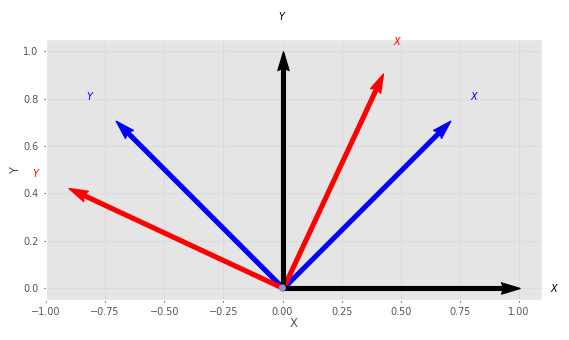

In [119]:
import math
import numpy as np
from scipy import linalg, optimize
import matplotlib.pyplot as plt 
from spatialmath import *
from spatialmath.base import * 
from spatialmath.base import sym
from spatialgeometry import *
from roboticstoolbox import *

def plot_rotated(angle1,angle2):
    #plotvol2([-2,2]); # -- slices data to certain parameters

    e1 = trot2(math.radians(angle1))
    e2 = e1@trot2(math.radians(angle2))
    
    trplot2(e1, color="b")
    trplot2(e2, color="r")

    # reference frame
    e0 = trot2(0)
    trplot2(e0, color = "k")
    
plot_rotated(45,20)

### 03.04

**Without using the Robotics Toolbox** write a Python function which accepts 2 arguments, an angle $\theta$ and a list (txty) corresponding to a translation vector. The function should return the 3 × 3 homogeneous transformation for that angle and translation as a numpy array.

In [145]:
from math import *

def hom_tra(theta, tr_list):
    R = [[cos(theta), -sin(theta), tr_list[0]],
         [sin(theta), cos(theta) , tr_list[1]],
         [0         , 0          ,  1       ]]
    return np.array(R)

print(hom_tra(math.pi, [1,2]))

[[-1.0000000e+00 -1.2246468e-16  1.0000000e+00]
 [ 1.2246468e-16 -1.0000000e+00  2.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]


***with robotics toolbox:***

In [147]:
print(transl2(1,2) @ trot2(math.pi))

[[-1.0000000e+00 -1.2246468e-16  1.0000000e+00]
 [ 1.2246468e-16 -1.0000000e+00  2.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]


> #### **Returning homogeneous transformation for an angle and translation (2D)**
> `transl2(x_coordinate, y_coordinate) @ trot2(angle_theta)`

### 03.05

A frame B is created by rotating a **3D frame A** about the z axis by 70 degrees and translating frame A by 20 units in axis x and 10 units in axis y.

##### 1. Write some Python code which returns a **numpy array corresponding to the homogeneous transformation** describing the above.

In [155]:
import math
import numpy as np
from scipy import linalg, optimize
import matplotlib.pyplot as plt
from spatialmath import *
from spatialmath.base import *
from spatialmath.base import sym
from spatialgeometry import *
from roboticstoolbox import *
from sympy import *

# Define the rotation angle in degrees and convert to radians
theta = np.radians(70)

# Create the translation 
T = (20, 10, 0)  

# Create the rotation matrix for rotation about the z-axis
R = np.array([[np.cos(theta), -np.sin(theta), 0, T[0]],
              [np.sin(theta),  np.cos(theta), 0, T[1]],
              [0            , 0             , 1, T[2]],
              [0            , 0             , 0, 1  ]])



simplify(R)

[[0.342020143325669, -0.939692620785908, 0.0, 20.0], [0.939692620785908, 0.342020143325669, 0.0, 10.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]]

or

In [165]:
R = transl(20,10,0) @ trotz(math.radians(70))
simplify(R)

[[0.342020143325669, -0.939692620785908, 0.0, 20.0], [0.939692620785908, 0.342020143325669, 0.0, 10.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]]

> #### **Returning homogeneous transformation for an angle and translation (3D)**
> `transl(x_coordinate, y_coordinate, z_coordinate) @ trotz(angle_theta)`

A point $P$ has the following coordinates with respect to frame $B$: (3.1, 8, 2). **Calculate the coordinates of point $P$ with respect to frame $A$** using the homogeneous transformation you calculated previously.

In [174]:
import math
import numpy as np
from scipy import linalg, optimize
import matplotlib.pyplot as plt
from spatialmath import *
from spatialmath.base import *
from spatialmath.base import sym
from spatialgeometry import *
from roboticstoolbox import *
from sympy import *

B = transl(20,10,0) @ trotz(math.radians(70))

P = [3.1, 8, 2, 1] 
 
simplify(B @ P)



[13.5427214780223, 15.6492082710417, 2.0, 1.0]

**Remembering that,**






### **Elementary Rotation Matrices in 3D**
 Rotation about the **$x$-axis**:
 $$
R_x(\theta) = \begin{bmatrix} 1 & 0 & 0 \\
0 & cos\theta & -sin\theta \\
0 & sin\theta & cos\theta
\end{bmatrix} \implies \text{ with translation: } 
 $$
 $$
R_x(\theta) = \begin{bmatrix} 1 & 0 & 0 & v_x \\
0 & cos\theta & -sin\theta & v_y \\
0 & sin\theta & cos\theta & v_z \\
0 & 0 & 0 & 1
\end{bmatrix}
 $$

Rotation about the **$y$-axis**:

 $$
R_y(\theta) = \begin{bmatrix}
cos\theta & 0 & sin\theta \\
0 & 1 & 0 \\
-sin\theta & 0 & cos\theta
\end{bmatrix}\implies \text{ with translation: } 
 $$
 $$
R_y(\theta) = \begin{bmatrix}
cos\theta & 0 & sin\theta & v_x \\
0 & 1 & 0 & v_y\\
-sin\theta & 0 & cos\theta & v_z \\
0 & 0 & 0 & 1
\end{bmatrix}
 $$

 Rotation about the **$z$-axis**:

 $$
R_z(\theta) = \begin{bmatrix}
cos\theta & -sin\theta & 0 \\
sin\theta & cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}\implies \text{ with translation: } 
 $$
 $$
R_z(\theta) = \begin{bmatrix}
cos\theta & -sin\theta & 0 & v_x \\
sin\theta & cos\theta & 0 & v_y \\
0 & 0 & 1 & v_z \\
0 & 0 & 0 & 1
\end{bmatrix}
 $$

### ! Applications of Homogenous Transformations

Consider a point $A$ with coordinates given in a local reference frame $N$. The coordinates of point $A$ in frame $N$ are $A_N = \begin{bmatrix} x_N \\ y_N \\ z_N \\ 1 \end{bmatrix}$, expressed in homogeneous form. The relationship between the initial reference frame $M$ and frame $N$ is described by a 3D homogeneous transformation matrix $T_{M \to N}$, which is derived from a given rotation (angle) and translation ($x, y, z$).

Using the transformation matrix $T_{M \to N}$, determine the coordinates of point $A$ in the initial frame $M$.

Provide a step-by-step solution and show the final expression for $A_M$, the coordinates of point $A$ with respect to frame $M$.


1. Define the homogeneous **coordinates of point $A$ in frame $N$**:

$$
A_N = \begin{bmatrix} x_N \\ y_N \\ z_N \\ 1
\end{bmatrix}
$$

These are coordinates of point $A$ **in** frame $N$.

2. **Multiply** by the homogeneous transformation matrix $T_{M \to N}$

$$
A_M = T_{M \to N} \cdot A_N
$$

where $T_{M \to N}$ is a matrix in the form:

$$
T_{M \to N} = \begin{bmatrix} R & t \\
0 & 1
\end{bmatrix}
$$

where $R$ is the rotation matrix and $t$ is the translation vector.

$$
A_M = \begin{bmatrix} R & t \\
0 & 1
\end{bmatrix} \cdot \begin{bmatrix} x_N \\ y_N \\ z_N \\ 1
\end{bmatrix}
$$

3. The result will be a new homogeneous coordinate of point $A$ in the initial frame $M$:

$$
A_M = \begin{bmatrix} x_M \\ y_M \\ z_M \\ 1
\end{bmatrix}
$$

**for example:**

Suppose we have a point $A$ in frame $N$ with coordinates: 

$$
A_N = \begin{bmatrix} 2 \\ 3 \\ 4 \\ 1
\end{bmatrix}
$$

The transformation matrix from **frame $N$** to **frame $M (T_{M \to N})$** is given as:

$$
T_{M \to N} = \begin{bmatrix} 0 & -1 & 0 & 1 \\
1 & 0 & 0 & 2 \\
0 & 0 & 1 & 3 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

We want to find the coordinates of $A$ in **frame $M (A_M)$**

Knowing that, 

$$
A_M = T_{M \to N} \cdot A_N
$$

Substitute the values:

$$
T_{M \to N} = \begin{bmatrix} 0 & -1 & 0 & 1 \\
1 & 0 & 0 & 2 \\
0 & 0 & 1 & 3 \\
0 & 0 & 0 & 1
\end{bmatrix} , A_N = \begin{bmatrix} 2 \\ 3 \\ 4 \\ 1
\end{bmatrix}
$$

**Multiply**:

$$
A_M = \begin{bmatrix} 0 & -1 & 0 & 1 \\
1 & 0 & 0 & 2 \\
0 & 0 & 1 & 3 \\
0 & 0 & 0 & 1
\end{bmatrix} \cdot \begin{bmatrix} 2 \\ 3 \\ 4 \\ 1
\end{bmatrix}
$$

$$ \implies x_M = (0)(2)+(−1)(3)+(0)(4)+(1)(1)=−3+1=−2 
$$
$$ \implies y_M = (1)(2)+(0)(3)+(0)(4)+(2)(1)=2+2=4 
$$
$$ \implies z_M = (0)(2)+(0)(3)+(1)(4)+(3)(1)=4+3=7
$$

Result:

$$ A_M = \begin{bmatrix} -2 \\ 4 \\ 7 \\ 1
\end{bmatrix}
$$

## 04 - Forward Kinematics

$$
\text{ Homogeneous Matrix} = \text{Transf}_1 * \text{Transf}_2 * \text{Transf}_3 * . . . * \text{Transf}_n
$$

Where $n$ is the number of links.

In a 1-joint Robot Arm, with a Rotation angle $q_1$ and translation $a_1$, the homogenous transformation:

$$
\text{ End Effector} = \text{Rot}(q_1) \cdot T_x(a_1)
$$

In Python:

```e = trot2(q1) @ transl2(a1, 0)```

or 

```e = ET2.R() * ET2.tx(a1)```

In a 3-joint Planar Robot Arm, the  homogeneous transformation describing the overall result can be calculated using the following:

$$
\text{ End Effector} = \text{Rot}(q_1) \cdot T_x(a_1) \cdot \text{Rot}(q_2) \cdot T_x(a_2) \cdot \text{Rot}(q_3) \cdot T_x(a_3)
$$

In [62]:
from sympy import *

q1, q2, q3 = symbols("q1, q2, q3")
a1, a2, a3 = symbols("a1, a2, a3")

E = trot2(q1) @ transl2(a1, 0)@trot2(q2)@transl2(a2, 0) @ trot2(q3) @ transl2(a3, 0)
simplify(E)

[[cos(q1 + q2 + q3), -sin(q1 + q2 + q3), a1*cos(q1) + a2*cos(q1 + q2) + a3*cos(q1 + q2 + q3)], [sin(q1 + q2 + q3), cos(q1 + q2 + q3), a1*sin(q1) + a2*sin(q1 + q2) + a3*sin(q1 + q2 + q3)], [0, 0, 1]]


### 04.01 - Combined Transformations

A point $P$ with coordinates $[7, 3, 1]^T$ is attached to a frame $F$ which is subject to the following 3 successive transformations relative to the reference frame $F_{xyz}$:

1. **Rotation** of $90^\circ$ about the $y$-axis.
2. Followed by a **rotation** of $90^\circ$ about the $y$-axis.
3. Followed by a **translation** of $[4, -3, 7]$.

In [4]:
import math
import numpy as np
from scipy import linalg, optimize
import matplotlib.pyplot as plt
from scipy import spatial
from spatialmath import *
from spatialmath.base import *
from spatialmath.base import sym
from spatialgeometry import *
from roboticstoolbox import *

P = [7,3,1,1]

tr1 = trotz(math.radians(90))
tr2 = troty(math.radians(90))
tr3 = transl(4,-3,7)

result = tr3@tr2@tr1@P

print(result)

[ 5.  4. 10.  1.]


In [199]:
import math
import numpy as np
from scipy import linalg, optimize
import matplotlib.pyplot as plt
from spatialmath import *
from spatialmath.base import *
from spatialmath.base import sym
from spatialgeometry import *
from roboticstoolbox import *

q1 = radians(90)
# 1st transformation - 'trotz'
tr1 = np.array([[cos(q1)    , -sin(q1)    , 0    , 0],
                [sin(q1)    ,  cos(q1)    , 0    , 0],
                [ 0         , 0           , 1    , 0],
                [ 0         , 0           , 0    , 1]])
# 2nd transformation - 'troty'
tr2 = np.array([[cos(q1)    , 0    , sin(q1)     , 0    ],
                [0          , 1    , 0           , 0    ],
                [-sin(q1)   , 0    , cos(q1)     , 0    ],
                [0          , 0    , 0           , 1    ]])
# 3rd transformation - 'transl'
tr3 = np.array([[1    , 0    , 0    , 4    ],
                [0    , 1    , 0    , -3   ],
                [0    , 0    , 1    , 7    ],
                [0    , 0    , 0    , 1    ]])
# initial point
P = np.array([7, 3, 1, 1])

simplify(tr3@tr2@tr1@P)

[5.0, 4.0, 10.0, 1]

 ### The Denavit-Hartenberg (DH) Notation

 $A_i = Rot_{z,\theta_i} \cdot Trans_{z,d_i} \cdot Trans_{x,r_i} \cdot Rot_{x,\alpha_i}$

4 parameters used associated with each link $i$ and joint $j$:

* $\theta_i \to $ joint angle
* $d_i \to $ link offset
* $r_i \to $ link lenght
* $\alpha_i \to $ link twist

 
 $A_i = Rot_{z,\theta_i} \cdot Trans_{z,d_i} \cdot Trans_{x,r_i} \cdot Rot_{x,\alpha_i} \implies$
 $$
 \begin{bmatrix}
cos(\theta_i) & -sin(\theta_i) & 0 & 0 \\
sin(\theta_i) & cos(\theta_i) & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix} \cdot \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & d_i \\
0 & 0 & 0 & 1
\end{bmatrix} \cdot 
 $$
 $$ \begin{bmatrix}
1 & 0 & 0 & r_i \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix} \cdot \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & cos(\alpha_i) & -sin(\alpha_i) & 0 \\
0 & sin(\alpha_i) & cos(\alpha_i) & 0 \\
0 & 0 & 0 & 1
\end{bmatrix} =
 $$
 $$
    \begin{bmatrix}
cos(\theta_i) & -sin(\theta_i)cos(\alpha_i) & sin(\theta_i)sin(\alpha_i) & r_{i}cos(\theta_i) \\
sin(\theta_i) & cos(\theta_i)cos(\alpha_i) & -cos(\theta_i)sin(\alpha_i) & r_{i}sin(\theta_i) \\
0 & sin(\alpha_i) & cos(\alpha_i) & d_i \\
0 & 0 & 0 & 1
\end{bmatrix} 
 $$

 `DH_Tr = trotz(theta) @ transl(0,0,d) @ transl(r,0,0) @ trotx(alpha)`

### 04.02 - DH Matrix Derivation
Consider the following DH table:

|Joint | $\theta$ | d | r | $\alpha$
| --   | --| --| --|--
|1 | $\theta$  |d |r | $\alpha$

1. Use Python to **derive the DH matrix** by applying the 4 basic transformations shown on the left hand side of Equation (6) of the last lecture.
Use SymPy to create the corresponding symbols before creating the 4 basic matrix transformations.
2. Check that your calculated DH matrix matches with the one shown on the right hand side of Equation (7) of the last lecture slides.

In [229]:
import math
import numpy as np
from scipy import linalg, optimize
import matplotlib.pyplot as plt
from spatialmath import *
from spatialmath.base import *
from spatialmath.base import sym
from spatialgeometry import *
from roboticstoolbox import *

theta, r, d, alpha = symbols('theta r d alpha')

A = [[cos(theta), -sin(theta), 0, 0],
     [sin(theta), cos(theta) , 0, 0],
     [0         , 0          , 1, 0],
     [0         , 0          , 0, 1]]
#convert to sympy matrix
A = Matrix(A)

B = [[1 , 0 , 0 , 0 ],
     [0 , 1 , 0 , 0 ],
     [0 , 0 , 1 , d ],
     [0 , 0 , 0 , 1 ]]
B = Matrix(B)

C = [[1 , 0 , 0 , r],
     [0 , 1 , 0 , 0],
     [0 , 0 , 1 , 0],
     [0 , 0 , 0 , 1]]
C = Matrix(C)

D = [[1 ,          0 , 0           , 0],
     [0 , cos(alpha) , -sin(alpha) , 0],
     [0 , sin(alpha) , cos(alpha)  , 0],
     [0 , 0          , 0           , 1]]
D = Matrix(D)

res = simplify(A@B@C@D)
res

Matrix([
[cos(theta), -sin(theta)*cos(alpha),  sin(alpha)*sin(theta), r*cos(theta)],
[sin(theta),  cos(alpha)*cos(theta), -sin(alpha)*cos(theta), r*sin(theta)],
[         0,             sin(alpha),             cos(alpha),            d],
[         0,                      0,                      0,            1]])

or

In [231]:
theta, r, d, alpha = symbols('theta r d alpha')

result = trotz(theta) @ transl(0,0,d) @ transl(r,0,0) @ trotx(alpha)
simplify(result)

[[cos(theta), -sin(theta)*cos(alpha), sin(alpha)*sin(theta), r*cos(theta)], [sin(theta), cos(alpha)*cos(theta), -sin(alpha)*cos(theta), r*sin(theta)], [0, sin(alpha), cos(alpha), d], [0, 0, 0, 1]]

### 04.03 - DH Matrix

Consider a 2-joint robot with the following DH table:

|Joint | $\theta$  | d    | r    | $\alpha$   |
|--    | --        | --   | --   |--          |
|1     | $\theta_1$|$d_1$ |$r_1$ | $\alpha_1$ |
|2     | $\theta_2$|$d_2$ |$r_2$ | $\alpha_2$ |

Determine the position of the robot’s end-effector. Use symbolic Python (SymPy) for the
calculations.

In [247]:
theta1, r1, d1, alpha1 = symbols('theta_1 r_1 d_1 alpha_1')

result_1 = trotz(theta1) @ transl(0,0,d1) @ transl(r1,0,0) @ trotx(alpha1)
#simplify(result_1)

theta2, r2, d2, alpha2 = symbols('theta_2 r_2 d_2 alpha_2')

result_2 = trotz(theta2) @ transl(0,0,d2) @ transl(r2,0,0) @ trotx(alpha2)
#simplify(result_2)

final_res = result_1 @ result_2
simplify(final_res)


[[-sin(theta_1)*sin(theta_2)*cos(alpha_1) + cos(theta_1)*cos(theta_2), sin(alpha_1)*sin(alpha_2)*sin(theta_1) - sin(theta_1)*cos(alpha_1)*cos(alpha_2)*cos(theta_2) - sin(theta_2)*cos(alpha_2)*cos(theta_1), sin(alpha_1)*sin(theta_1)*cos(alpha_2) + sin(alpha_2)*sin(theta_1)*cos(alpha_1)*cos(theta_2) + sin(alpha_2)*sin(theta_2)*cos(theta_1), d_2*sin(alpha_1)*sin(theta_1) + r_1*cos(theta_1) - r_2*sin(theta_1)*sin(theta_2)*cos(alpha_1) + r_2*cos(theta_1)*cos(theta_2)], [sin(theta_1)*cos(theta_2) + sin(theta_2)*cos(alpha_1)*cos(theta_1), -sin(alpha_1)*sin(alpha_2)*cos(theta_1) - sin(theta_1)*sin(theta_2)*cos(alpha_2) + cos(alpha_1)*cos(alpha_2)*cos(theta_1)*cos(theta_2), -sin(alpha_1)*cos(alpha_2)*cos(theta_1) + sin(alpha_2)*sin(theta_1)*sin(theta_2) - sin(alpha_2)*cos(alpha_1)*cos(theta_1)*cos(theta_2), -d_2*sin(alpha_1)*cos(theta_1) + r_1*sin(theta_1) + r_2*sin(theta_1)*cos(theta_2) + r_2*sin(theta_2)*cos(alpha_1)*cos(theta_1)], [sin(alpha_1)*sin(theta_2), sin(alpha_1)*cos(alpha_2)*cos(the

### 04.04 - 3-DOF Robot - Forward Kinematics Problem
Consider the 3-DOF robot shown in Figure 1. Its DH table is given by:

|Joint | $\theta$       | d     | r   | $\alpha$ |
| --   | --             | --    | --  |--        |
|1     | $\theta_1$     |$0$    |$r_1$| $0$      |
|2     | $90+\theta_2$  |$0$    |$0$  | $90$     |
|3     | $\theta_3$     | $d_3$ | $0$ | $0$      |

Determine the position of the robot’s end-effector. Use symbolic Python for the calculations.
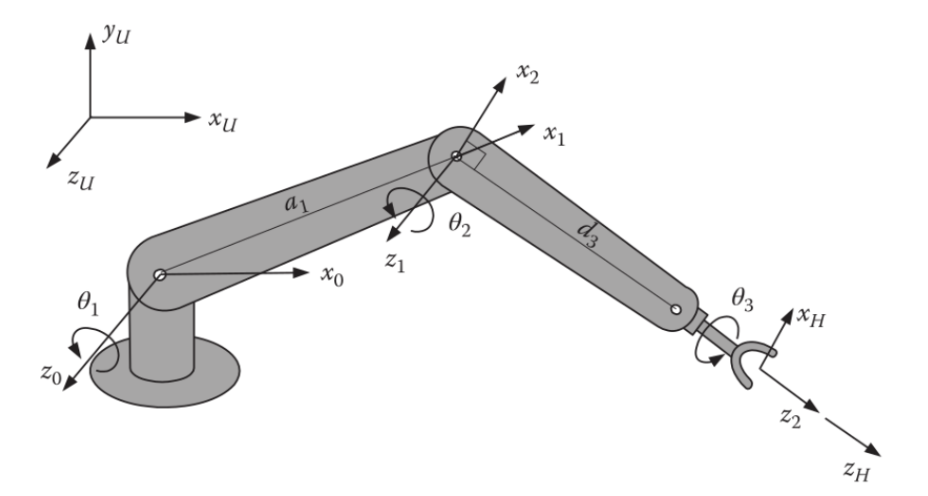

**Knowing that,**

| Radians ($\text{rad}$)     | Degrees ($^\circ$)    |
|----------------------------|------------------------|
| $0$                        | $0^\circ$             |
| $\frac{\pi}{6}$            | $30^\circ$            |
| $\frac{\pi}{4}$            | $45^\circ$            |
| $\frac{\pi}{3}$            | $60^\circ$            |
| $\frac{\pi}{2}$            | $90^\circ$            |
| $\pi$                      | $180^\circ$           |
| $\frac{3\pi}{2}$           | $270^\circ$           |
| $2\pi$                     | $360^\circ$           |



In [273]:
theta1, r1, theta2, theta3, d3 = symbols('theta1, r1, theta2, theta3, d3')

J1 = trotz(theta1)@transl(r1, 0, 0)
J2 = trotz(theta2 + math.pi/2)@trotx(math.pi/2)
J3 = trotz(theta3)@transl(0, 0, d3)

Matrix(simplify(J1@J2@J3))

Matrix([
[                            -3.74939945665464e-33*sin(theta3)*sin(theta1 + theta2) - 1.0*sin(theta1 + theta2)*cos(theta3) + 6.12323399573677e-17*sqrt(2)*cos(theta1 + theta2)*cos(theta3 + pi/4), -6.12323399573677e-17*(6.12323399573677e-17*sin(theta1 + theta2) + 1.0*cos(theta1 + theta2))*cos(theta3) + 1.0*(1.0*sin(theta1 + theta2) - 6.12323399573677e-17*cos(theta1 + theta2))*sin(theta3), 6.12323399573677e-17*sin(theta1 + theta2) + 1.0*cos(theta1 + theta2), 6.12323399573677e-17*d3*sin(theta1 + theta2) + 1.0*d3*cos(theta1 + theta2) + 1.0*r1*cos(theta1)],
[1.0*(6.12323399573677e-17*sin(theta1 + theta2) + 1.0*cos(theta1 + theta2))*cos(theta3) - 6.12323399573677e-17*(1.0*sin(theta1 + theta2) - 6.12323399573677e-17*cos(theta1 + theta2))*sin(theta3),                              -1.0*sin(theta3)*cos(theta1 + theta2) - 6.12323399573677e-17*sqrt(2)*sin(theta1 + theta2)*sin(theta3 + pi/4) + 3.74939945665464e-33*cos(theta3)*cos(theta1 + theta2), 1.0*sin(theta1 + theta2) - 6.12323399573677

### 04.05 - Python Programming
Write a Python function  which accepts 4 arguments: $\theta$, d, r, α and returns the DH
matrix corresponding to these parameters for a single robot joint.

In [284]:
def DH(theta, d, r, alpha):
    t1 = trotz(theta)
    t2 = transl(0, 0 , d)
    t3 = transl(r, 0 , 0)
    t4 = trotx(alpha)

    return t1@t2@t3@t4


### 04.06 - The Puma 560 Industrial Robot
The Unimation PUMA 560 is an industrial manipulator robot with 6 degrees of freedom and all rotational joints (i.e. it is a 6R mechanism).

The DH table for its joints is:

| Joint | $\theta$ | $r$   | $d$   | $\alpha$    |
|-------|----------|-------|-------|-------------|
| 1     | $\theta_1$ | $0$   | $0$   | $0^\circ$    |
| 2     | $\theta_2$ | $0$   | $0$   | $-90^\circ$  |
| 3     | $\theta_3$ | $r_2$ | $d_3$ | $0^\circ$    |
| 4     | $\theta_4$ | $r_3$ | $d_4$ | $-90^\circ$  |
| 5     | $\theta_5$ | $0$   | $0$   | $90^\circ$   |
| 6     | $\theta_6$ | $0$   | $0$   | $-90^\circ$  |

Use the implemented Python function of the previous Exercise 5, calculate the position of
the Puma 560 tool (end-effector).

In [66]:
def DH(theta, d, r, alpha):
    t1 = trotz(theta)
    t2 = transl(0, 0 , d)
    t3 = transl(r, 0 , 0)
    t4 = trotx(alpha)

    return t1@t2@t3@t4

theta1, theta2, theta3, theta4, theta5, theta6, r2, r3, d3, d4 = symbols('theta1, theta2, theta3, theta4, theta5, theta6, r2, r3, d3, d4')

table = [[theta1, 0 , 0 , 0         ],
         [theta2, 0 , 0 , -math.pi/2],
         [theta3, r2, d3, 0         ],
         [theta4, r3, d4, -math.pi/2],
         [theta5, 0 , 0 , math.pi/2 ],
         [theta6, 0 , 0 , -math.pi/2]]

total_dh = np.identity(4) # identity array is a square array 
#with ones on the main diagonal

for row in table:
    theta = row[0]
    d = row[1]
    r = row[2]
    alpha = row[3]

    total_dh = total_dh@DH(theta, d, r, alpha)

print(total_dh)

## 05 - Inverse Kinematics

Homogeneous Transformation in 3D - Inverse Transformations

The homogenous transformation matrix can be written as:

$$
\begin{bmatrix} R & d \\
0 & 1
\end{bmatrix}
$$

Where $R$ is the **rotation matrix** part and $d$ is the **translation vector** part. 

> then, the **Inverse of the matrix** can be calculated as:
 $$
\begin{bmatrix} R' & -R' * d \space \\
0 & 1
\end{bmatrix}
 $$

where:

$R' = R^T$ , the **transpose** of the original rotation matrix.
 
$-R' * d$ , the **adjusted translation vector**.

**Example:**
Suppose the original transformation matrix T is:

$$
T = \begin{bmatrix} R & d \\
0 & 1 
\end{bmatrix} = \begin{bmatrix}
cos\theta & -sin\theta & 0 & x \\
sin\theta & cos\theta & 0 & y \\
0 & 0 & 1 & z \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

The **inverse** transformation $T^{-1}$ becomes:

 $$
T^{-1} = \begin{bmatrix}
R^T & -R^T * d \space \\
0 & 1
\end{bmatrix}
$$

1. **Transpose the Rotation Matrix**: (swap rows and columns)

$$
R^T = \begin{bmatrix}
cos\theta & sin\theta & 0 \\
-sin\theta & cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

2. **Compute $-R^T * d$**: Multiply $R^T$ by $d = \begin{bmatrix} d_x \\ d_y \\ d_z \end{bmatrix}$ :

$$
-R^T \cdot d = - \begin{bmatrix} cos\theta & sin\theta & 0 \\
-sin\theta & cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix} \cdot \begin{bmatrix} d_x \\ d_y \\ d_z \end{bmatrix}
$$

$$
-R^T \cdot d = \begin{bmatrix} -(cos\theta d_x + sin\theta d_y) \\
-(-sin\theta d_x + cos\theta d_y) \\
-d_z
\end{bmatrix} = \begin{bmatrix} -cos\theta d_x -sin\theta d_y \\
sin\theta d_x - cos\theta d_y \\
-d_z
\end{bmatrix}
$$

3. **Combine to Form $T^{-1}$**:

 $$
T^{-1} = \begin{bmatrix} cos\theta & sin\theta & 0 & -cos\theta d_x -sin\theta d_y \\
-sin\theta & cos\theta & 0 & sin\theta d_x - cos\theta d_y \\
0 & 0 & 1 & -d_z \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

#### To **transpose**:

1. **Identify Rows and Columns**

A matrix of size $m \times n$ (rows $m$, columns $n$) will have a traspose of size $n \times m$ (rows $n$, columns $m$)

 $$
m \times n \implies n \times m
 $$

2.  **Swap rows and columns**

The element at position $(i, j)$ in the original matrix, becomes element $(j, i)$ in the transposed matrix.

 $$
(i, j) \implies (j, i)
$$

##### Example:

Consider a $3 \times 3$ rotation matrix:

$$
R = \begin{bmatrix} r_{11} & r_{12} & r_{13} \\
r_{21} & r_{22} & r_{23} \\
r_{31} & r_{32} & r_{33}
\end{bmatrix}
$$

Its **transpose** is:

$$
T^T = \begin{bmatrix} r_{11} & r_{21} & r_{31} \\
r_{12} & r_{22} & r_{32} \\
r_{13} & r_{23} & r_{33}
\end{bmatrix}
$$

#### To **multiply**:

1. Given:

$$
A = \begin{bmatrix} a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{bmatrix}
$$

$$
B = \begin{bmatrix} b_{11} & b_{12} \\
b_{21} & b_{22} \\
b_{31} & b_{32}
\end{bmatrix}
$$

2. $C = A \cdot B$ , where each element $c_{ij}$ in $C$ is calculated as the **dot product** of the $i$-th row of $A$ with the $j$-th column of $B$:

$$ C = \begin{bmatrix} a_{11}b_{11} + a_{12}b_{21} + a_{13}b_{31}  & a_{11}b_{12} + a_{12}b_{22} + a_{13}b_{32} \\
a_{21}b_{11} + a_{22}b_{21} + a_{23}b_{31} & a_{21}b_{12} + a_{22}b_{22} + a_{23}b_{32} \\
a_{31}b_{11} + a_{32}b_{21} + a_{33}b_{31} &  a_{31}b_{12} + a_{32}b_{22} + a_{33}b_{32}
\end{bmatrix}
$$

### ! Application of Inverse Transformations

Consider a reference frame $A$ which is the fixed world frame and a reference frame $B$ which is fixed to
the robot’s moving body. 

Given that we know the matrix for the pose of $B$ relative to $A$, how can we
determine the pose of $A$ relative to $B$?


Implement a Python function for your answer given above. The function accepts as a single argument
the pose of $B$ relative to $A$ matrix. It returns a matrix corresponding to the pose of $A$ relative to $B$.

> To determine the pose of **$A$ relative to $B$**, given the pose of **$B$ relative to $A$**, we simply compute the **inverse of the transformation matrix**.

If $T_{A \to B}$ represents the transformation matrix for $A$ relative to $B$, and $T_{B \to A}$ is the given transformation matrix for $B$ relative to $A$, then:

$$
T_{A \to B} = (T_{B \to A})^{-1}
$$

For a $4 \times 4$ homogeneous transformation matrix, the inverse can be computed as:

$$
T^{-1} = \begin{bmatrix} R^T & -R^Tt \\
0 & 1
\end{bmatrix}
$$

#### Python implementation of Inverse Transformation


In [58]:
import numpy as np

def inverse_transformation(matrix):
    # extract transformation matrix (3x3) and translation vector (3x1)
    R = matrix[:3, :3]
    t = matrix[:3, 3]

    # compute inverse transformation
    R_inv = R.T # transpose, so R^T
    t_inv = -np.dot(R_inv, t) # -R^Tt

    # construct the inverse transformation matrix
    inverse_matrix = np.eye(4) # start with a 4x4 identity matrix
    inverse_matrix [:3, :3] = R_inv
    inverse_matrix[:3, 3] = t_inv

    return inverse_matrix


Example usage:

Let's assume the pose of $B$ relative to $A$ is given as: 

$$
T_{B \to A} = \begin{bmatrix} 0 & -1 & 0 & 2 \\
1 & 0 & 0 & 3 \\
0 & 0 & 1 & 4 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

Compute the pose of $A$ relative to $B$:

In [59]:
# given pose of B relative to A
T_B_to_A = np.array([
    [0, -1, 0, 2],
    [1, 0, 0, 3],
    [0, 0, 1, 4],
    [0, 0, 0, 1]
])

# compute the pose of A relative to B

T_A_to_B = inverse_transformation(T_B_to_A)
print("Pose of A relative to B: \n", T_A_to_B)

Pose of A relative to B: 
 [[ 0.  1.  0. -3.]
 [-1.  0.  0.  2.]
 [ 0.  0.  1. -4.]
 [ 0.  0.  0.  1.]]


### 05.01 Calculating Analytical solutions for Inverse Kinematics

Consider a 2-joint Planar (2D) Robot:

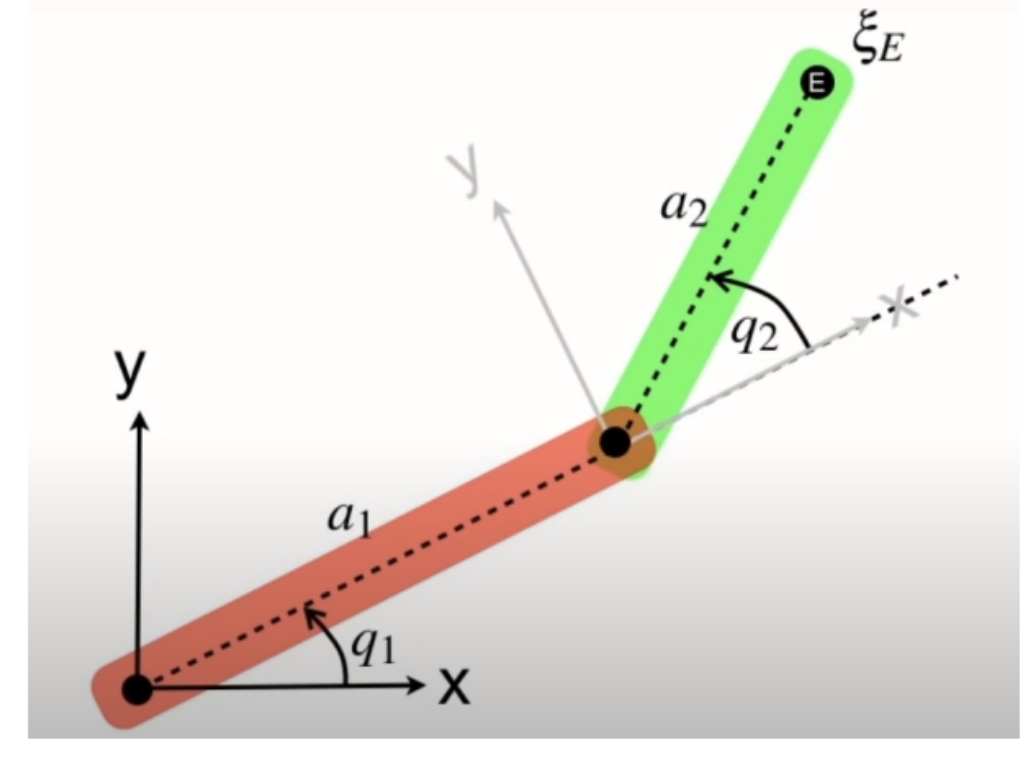

Given the position of the end effector ($x_E, y_E$), calculate the required joint angles to achieve this position.

In [19]:
import math
import numpy as np
from scipy import *
import matplotlib.pyplot as plt
from spatialmath import *
from spatialmath.base import *
from spatialmath.base import sym
from spatialgeometry import *
from roboticstoolbox import *
from sympy import *

# create symbols for lenghts of the 2 links

a1, a2 = symbols('a1 a2')

# symbols for JOINT angles

q1, q2 = symbols("q1:3")

# transformation to calculate the POSITION OF THE END EFFECTOR

e = ET2.R() * ET2.tx(a1) * ET2.R() * ET2.tx(a2)

# calculte the forward kinematics matric for the end effector: 
# FIND POSITION EF

TE = e.fkine([q1,q2])
#print(TE)

# the translation part of the matrix gives position (x_fk, y_fk) of the EF

x_fk, y_fk = TE.t

# create symbolic values to represent the position of the EF

x, y = symbols("x, y")

# x_fk = x and y_fk = y
# then, x_fk^2 + y_fk^2 - x^2 - y^2 = 0

eq1 = (x_fk**2 + y_fk**2 - x**2 - y**2).trigsimp()

import sympy #explicitly show that solve belongs to sympy!

q2_sol = sympy.solve(eq1, q2)
print(f"Solution for q2_0 : {q2_sol[0]}")
print(f"Solution for q2_1 : {q2_sol[1]}")

# expans the two equations x_fk = z , y_fk = y

eq2 = tuple(map(sympy.expand_trig, [x_fk - x, y_fk - y])) 
# map -> apply function to each element of the list

# solve for sin(q1), cos(q1)

q1_sol = sympy.solve(eq2, [sympy.sin(q1), sympy.cos(q1)])

''' tan(q1) = sin(q1)/cos(q1)
(q1_sol[sin(q1)]/q1_sol[cos(q1)]).simplify()
'''
# solve for q1
sympy.atan2(q1_sol[sin(q1)],q1_sol[cos(q1)]).simplify()

# atan -> reverse tan (in radians)
# calculates q1 in terms of x, y, q2

# q2 already solved above, so plug in x,y values, 
#find q2 and then use to solve q1!


Solution for q2_0 : -acos(-(a1**2 + a2**2 - x**2 - y**2)/(2*a1*a2)) + 2*pi
Solution for q2_1 : acos((-a1**2 - a2**2 + x**2 + y**2)/(2*a1*a2))


atan2((a1*y - a2*x*sin(q2) + a2*y*cos(q2))/(a1**2 + 2*a1*a2*cos(q2) + a2**2), (a1*x + a2*x*cos(q2) + a2*y*sin(q2))/(a1**2 + 2*a1*a2*cos(q2) + a2**2))

### 05.02 Calculating Numerical Solutions

Knowing that, 

 $$
    \xi EF = R_1 \cdot T_1 \cdot R_2 \cdot T_2 
$$

##### The Numerical Method **Error Function**:

 $$
q* = \text{arg} \space \underset{q}{\text{min}} (FK(q) - \xi E) \tag{*}
$$

##### The **Newton-Raphson** Algorithm:

 $$
f'(x_n)=\frac{f(x_n)}{x_n - x_n + 1} 
$$
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} 
$$



Calculate the numerical solution for a desired end-effector position (0.8, 0.49)


In [39]:
import math
import numpy as np
from scipy import *
import matplotlib.pyplot as plt
from spatialmath import *
from spatialmath.base import *
from spatialmath.base import sym
from spatialgeometry import *
from roboticstoolbox import *
from sympy import *

a1 = 1; a2 = 1
q1, q2 = symbols("q1:3")

e = ET2.R() * ET2.tx(a1) * ET2.R() * ET2.tx(a2)

print(e)


R(q0) ⊕ tx(1) ⊕ R(q1) ⊕ tx(1)


In [41]:
# desired position of the end-effector
des_pos = np.array([0.8, 0.49])

# define the error (E) function
def E(q):
    return np.linalg.norm(e.fkine(q).t - des_pos)

# minimise the error (E) between the forward kinematics solution and the 
# desitred position of the end-effector
# use optimize from SciPy
sol = optimize.minimize(E, [0, 0]) # [0, 0] -> a "guess", assign zero values

print(sol.x) # a_1, a_2

[-0.53300088  2.16512177]


In [42]:
# computing the forward kinematics confirms that the solution is correct
# Recall that we started the calculation for des_pos = np.array([0.8, 0.49])
e.fkine(sol.x).printline()

t = 0.8, 0.49; 93.5°


In [43]:
e.fkine(sol.x)

  -0.06129  -0.9981    0.8       
   0.9981   -0.06129   0.49      
   0         0         1         


In short:

In [47]:
a1 = 1; a2 = 1
q1, q2 = symbols("q1:3")

e = ET2.R()*ET2.tx(a1)*ET2.R()*ET2.tx(a2)

des_pos = np.array([0.8, 0.49])

def E(q):
    return np.linalg.norm(e.fkine(q).t - des_pos)
    
sol = optimize.minimize(E, [0, 0]) 
print(sol.x)

[-0.53300088  2.16512177]


### 05.03 - Calculating Numerical Solutions of Inverse Kinematics Cont.

Calculate the numerical solution for a desired end-effector position (0.8, 0.49). Link a3 = 2

In [49]:
a1 = 1; a2 = 1; a3 = 2
q1, q2, q3 = symbols("q1:4")

e = ET2.R() * ET2.tx(a1) * ET2.R() * ET2.tx(a2) * ET2.R() * ET2.tx(a3)

des_pos = np.array([0.8, 0.49])

def E(q):
    return np.linalg.norm(e.fkine(q).t - des_pos)
 
sol = optimize.minimize(E, [0, 0, 0])
print(sol.x)

[-7.17335894  4.4609537   3.71274858]


In [52]:
# computing the forward kinematics confirms that the solution is correct
# Recall that we started e.fkine(sol.x) calculation for des_pos = np.array([0.8, 0.49])
e.fkine(sol.x).printline()

t = 0.8, 0.49; 57.3°


In [51]:
e.fkine(sol.x)

   0.54     -0.8417    0.8       
   0.8417    0.54      0.49      
   0         0         1         


## 06 - Control Part I

Control is the <u>the best next action to take</u> (given a specific state) so as to <u> achieve (optimise) specific objectives</u>.

Actuators $\implies$ Motors.

#### Open-Loop Control 
Feedforward control, where control action from the controller is **independent** of the process output.
> NO feedback from the plant output to the controller.
> 
> No errors are taken onto account.

#### Closed-Loop (Feeback) Control
Takes onto accout **Error Reponse**.

the **desired** joint position of a multi-joint robot(plant) is $\theta_d(t)$ and the actual join positiion is $\theta(t)$, then the joint error is:

$$
\theta_e = \theta_d(t) - \theta(t)
$$


An ideal controller would drive the error to 0 instantly and keep it 0 forever.

In practice, it takes time to reduce errror, and value 0 might never be achieved.

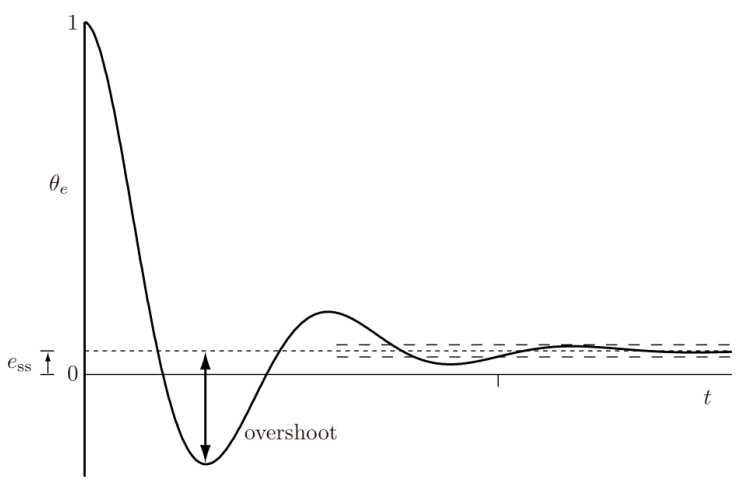

So, $\theta_e(t)$ can be described by:

* Steady-state response: the error as time goes to infinity

$$
t \to \infty
$$

* Transient reponse : *overshoot*, *settling time*

A **good** controller acheives an ER $\theta_e(t)$ with:

* small or no steady-state error
* little or no overshot
* a short settling time
* stability: no oscillations

### Multi-Joint Manipulator Robot Control -  Independent Joint Control

A common robot control strategy for manipulators:

* **Each joint** has its **own controller**.
* Only a **few parameters of** the software **controller** need to be **changed**.
* Parameters changed are done in a way so that they can **control the different size motors** attached to each joint.

### Discrete vs Continous Dynamic Systems

Discrete dynamic systems are described by **DIFFERENCE** equations: (e.g.)

$$
x(n) = 5 * x(n - 1) + 6 * x(n - 2) + 2
$$

Continouos dynamic systems are described by **DIFFERENTIAL** equations: (e.g.)

$$
\ddot{x} = 5 * \dot{x} + 10 * x +10
$$

### Linear vs Non-Linear Control

Although in practice many robotic systems follow **non-linear** dynamics, 

* In many cases a linear model can be developed (easier to develop controllers, analyse mathematically, prove stability).

Not possible to linearise complex dynamic systes, however.

## 07 - Control Part II

### Feedback Controllers - PID

There are many types of controllers and control algorithms, 

The simplest and most commonly used for certain systems in industrial process control, is **PID control**.

$$
\text{Proportional} + \text{Integral} + \text{Derivative}
$$

* can have **just** the $P$ component
* or both $P$ and $I$ ($PI$)
* or both $P$ and $D$ ($PD$)
* or all ($PID$)

### **Proportional** Control ($P$)

$$
\text{action} = K_p \cdot e(t) \tag{1}
$$

Controller applies an **action** which is **proportional** to the **error** $e(t)$.

Where $K_p$ is the **gain of the proportional controller**.


Consider a robot that we would like to keep following a **give** path at a distance of $d1$.

* The error at any time $t$ is measured by

$$
e(t) = d_1 - d
$$

$\space \space \space\space \space \space$   where $d$ is the **minimum** current distance from the given path.

* if $e(t) > 0 \implies$ the action would be **turn by** $K_p \cdot e$ degrees **AWAY** from the path.
* if $e(t) < 0 \implies$ the action would be **turn by** $K_p \cdot e$ degrees **TOWARDS** the path. 

Proportional control ($P$) might not be ale to extinguish a steady-state error!

### **Integral** Control ($I$)

$$
\text{integral error} = K_i \cdot \int_{t}^{0} e(\tau)d\tau \,  \tag{2}
$$

Where $K_i$ is the **integral gain**.

The integral error calculates the **accumulated error over time** $\implies$ introduces **MEMORY for the error**.

* Integral error helps in reducing steady-state error, but can lead to overshooting.


**Remembering that** the slope of the tangent line is equal to the derivative, 

### **Derivative** Control ($D$)

$$
\text{derivative error} = K_d \cdot \frac{de(t)}{dt} \tag{3}
$$

It takes into account **how fast the error changes**.

**Reduces overshooting**.

### $PID$ Control

Combining 2 or all 3 components (individual **gains can be set to 0** to leave out one or two components from $I$, $D$).

$$
\text{action} = K_{p} \cdot e(t) + K_i \cdot \int_{t}^{0} e(\tau)d\tau \, + K_d \cdot \frac{de(t)}{dt}	\tag{4}
$$

$$
\space \space \space \implies \text{action} = \space \space \space \space \space \space \space \space \space \space \space \space  (1) \space \space \space \space  + \space \space \space \space \space \space \space \space (2) \space \space \space \space  \space \space \space \space  + \space \space \space \space  (3) \space \space \space \space \space \space \space \space  
$$

#### $PID$ Tuning

A difficult task is to find an appropriate set of the **gain** parameters $K_p$, $K_i$, $K_d$ of the controller so as to optimise for:

* steady-state error
* transient response
* overshooting
* settling time

### The **Laplace Transform**

As we've established, **discrete** dynamic systems are described by **differnce** equations, and **continuous** dynamic systems are described by **differential** equations.

*Linear differential equations* describing physical dynamic systems can be transformed **to algebraic** equations which can be more easily solved/analysed using the Laplace transform.

For example, in the robotic arm performing a surgery system (the **Mass Spring Damper** system):

$$
m\ddot{x} + b\dot{x} + kx = f
$$

Assuming **all initial conditions are set to 0**, then its Laplace transform is:

$$
ms^2 + bs + k = F(s)
$$

### **Transfer Functions**

The ratio of the Laplace transform of the **output** variable $Y(s)$ to the Laplace transform of the **input** variable $R(s)$, with all initial conditions assumed to be 0:

$$
G(s) = \frac{Y(s)}{R(s)}
$$

### Feedback (**Closed Loop**) Controllers Transfer Functions

$$
R(s) \to \text{Controller } G_C(s) \to \text{Process } G(s) \to Y(s)
$$

The Transfer Function of the closed-loop system:

$$
T(s) = \frac{G(s)G_c(s)}{1 + G(s)G_c(s)}
$$

* A system is **unstable** where the closed loop transfer function **diverges** for $s$ ( eg. $\to G(s)G_c(s) = -1$)
* **Stability** is guaranteed when $G(s)G_c(s) < -1 $

#### PID Control for the Robot Arm Surgeon (Simulink)

$$
m\ddot{x} + b\dot{x} + kx = f
$$

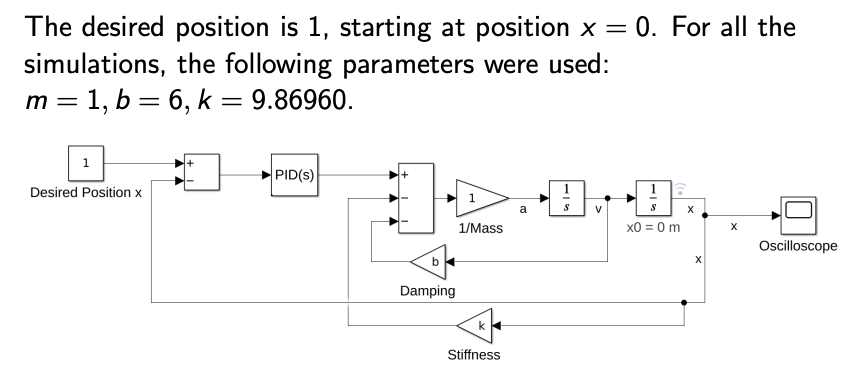

### 07.02 - Implementing a Dynamic System and a Controller in Code (not Simulink)

In this exercise we will develop PID controller in Python code (not Simulink) of the car cruise
control system.


*Knowing that,*

* The function of the $PID$ controller:

$$
  \text{action} = K_{p} \cdot e(t) + K_i \cdot \int_{t}^{0} e(\tau)d\tau \, + K_d \cdot \frac{de(t)}{dt}	
  $$

* The function of the car cruise control system:

$$
  \dot{v} = \frac{1}{m} \cdot (u - bv)
  $$

In [57]:
import numpy as np

# define the PID function

def PID(k_p, e_t, k_i, integral_error, k_d, e, et, dt):

    proportional_control = k_p * e_t
    integral_control = k_i * integral_error
    derivative_control = k_d * ((e-et)/dt)

    action = proportional_control + integral_control + derivative_control

    # update the integral error and previous error for the next iteration
    integral_error += e_t * dt
    et = e_t

    # return the control action AND updated integral_error and et for the
    # next iteration

    return action, integral_error, et

# define the function of the system, in this case the car cruise control

def car_cruise_control(m, u, b, v):
    vdot = 1/m * (u - (b*v))
    return vdot

# run the simulated system and PID

def run_simulation():
    # system parameters
    m = 1000 # mass of car
    b = 50 # damping coefficient
    desired_speed = 500

    # PID controller parameters
    k_p = 800 
    k_i = 40
    k_d = 0

    # time step and simulation time
    dt = 0.01
    total_time = 120
    num_steps = int(total_time / dt) # for the loop

    # initialise variables

    v = 0.0 #initial velocity
    integral_error = 0
    et = 0 

    # initialise store results
    velocities = []
    control_inputs = []

    # run the simulation
    for step in range(num_steps):
        # Calculate the error at each time step
        e_t = desired_speed - v  # Error between desired speed and current velocity
        # Use the PID controller to calculate the control force (u)
        u, integral_error, et = PID(k_p, e_t, k_i, integral_error, k_d, e_t, et, dt)
        
        # Calculate the system's rate of change of velocity (vdot)
        vdot = car_cruise_control(m, u, b, v)
        
        # Update velocity based on the system dynamics
        v += vdot * dt
        
        # Store results for later analysis
        velocities.append(v)
        control_inputs.append(u)
    
    # Return the results
    return velocities, control_inputs

# Run the simulation and capture the results
velocities, control_inputs = run_simulation()

# Results printing only the last ones
print(f'Final velocity: {velocities[-1]:.2f}')
print(f'Final control input: {control_inputs[-1]:.2f}')

Final velocity: 500.00
Final control input: 25000.00
